# Atividade
###**Grupo 5**

## Alunos
- Daniel Sena (dmms@cesar.school)
- Victor Souza (vrss@cesar.school)
- Olavo Ferraz Neto (ofn@cesar.school)
- Pedro Vitor Almeida de Melo (pvam@cesar.school)

In [1]:
import pandas as pd
df_mall_customers = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')
df_mall_customers.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df_mall_customers['Genre'] = df_mall_customers['Genre'].map({'Male': 0, 'Female': 1})

In [4]:
df_mall_customers.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


In [5]:
import plotly.express as px
fig = px.scatter(df_mall_customers,
                 x='Age',
                 y='Spending Score (1-100)',
                 title='Relação entre Idade e Pontuação de Gastos',
                 labels={'Age':'Idade', 'Spending Score (1-100)':'Pontuação de Gastos'},
                 color='Spending Score (1-100)',
                 height=600,
                 width=1400)

fig.show()


In [6]:
fig = px.scatter(df_mall_customers,
                 x='Age',
                 y='Annual Income (k$)',
                 title='Relação entre Idade e Gasto Anual',
                 labels={'Age':'Idade', 'Annual Income (k$)':'Gasto Anual'},
                 color='Annual Income (k$)',
                 height=600,
                 width=1400)

fig.show()


## Dendograma

### Single

In [7]:
import numpy as np
import seaborn as sns
# Defininndo a seed
np.random.seed(5)

# Definindo aleatoriamente 10 clientes
index_dendogram = np.random.randint(0, len(df_mall_customers), 10)

In [8]:
df_dendogram = df_mall_customers.loc[index_dendogram]
df_dendogram.set_index('CustomerID', inplace=True)
df_dendogram

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
100,0,20,61,49
190,1,36,103,85
119,1,51,67,43
145,0,25,77,12
74,1,60,50,56
9,0,64,19,3
191,1,34,103,23
156,1,27,78,89
113,1,38,64,42


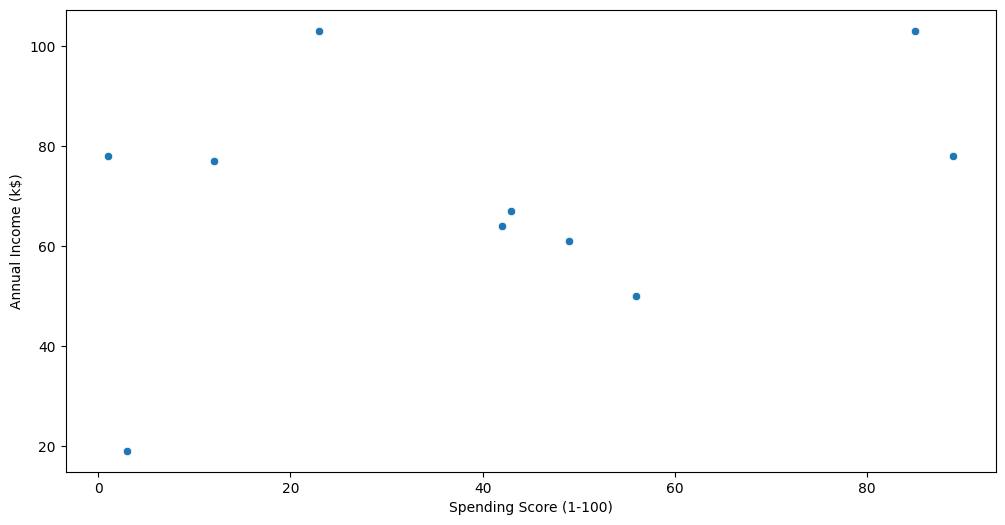

In [9]:
# fig = px.scatter(df_dendogram, x='Spending Score (1-100)', y='Annual Income (k$)', hover_data={'CustomerID':df_dendogram.index})
# fig.update_traces(marker=dict(size=15))
# fig.show()

ax = sns.scatterplot(data=df_dendogram, x='Spending Score (1-100)', y='Annual Income (k$)')
ax.figure.set_size_inches(12,6)

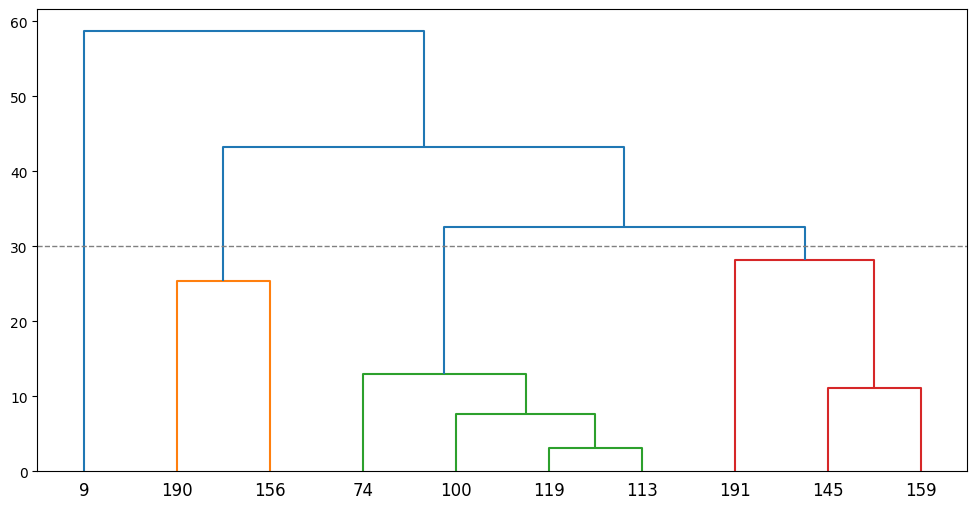

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
import matplotlib.pyplot as plt

# Define o tamanho da figura antes de criar o dendrograma
plt.figure(figsize=(12, 6))

# Calcular a distância entre cada amostra
Z = single(df_dendogram[['Spending Score (1-100)', 'Annual Income (k$)']])
tr = 30

# Controlar o número de clusters no gráfico e adicionar uma linha horizontal
dendrogram(Z, color_threshold=tr, labels=df_dendogram.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Mostrar o gráfico
plt.show()


In [11]:
labels = fcluster(Z, t=tr, criterion='distance')
df_dendogram['cluster_id'] = labels
df_dendogram['cluster_id'] = df_dendogram['cluster_id'].astype('str')
df_dendogram.sort_values(by='cluster_id', inplace=True)

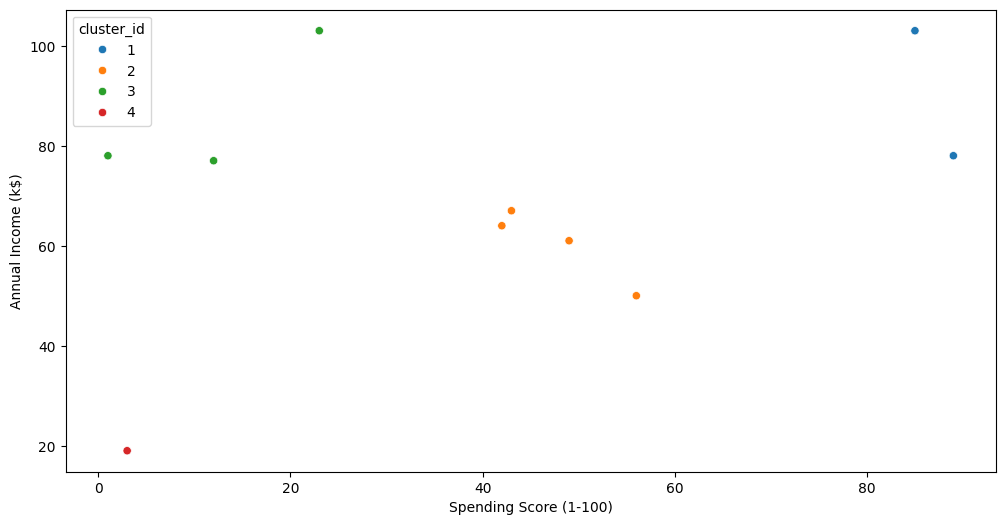

In [12]:
# fig = px.scatter(df_dendogram, x='Spending Score (1-100)', y='Annual Income (k$)', hover_data={'CustomerID':df_dendogram.index},
#                  color='cluster_id')
# fig.update_traces(marker=dict(size=15))
# fig.show()
ax = sns.scatterplot(data=df_dendogram, x='Spending Score (1-100)', y='Annual Income (k$)', hue='cluster_id')
ax.figure.set_size_inches(12,6)

### Linkage

In [13]:
index_linkage  = np.random.randint(0, len(df_mall_customers), 10)
index_linkage

array([  7, 143, 113, 181,  80,  27,  44,  65, 175,  30])

In [14]:
df_dendogram = df_mall_customers.loc[index_linkage]
df_dendogram.set_index('CustomerID', inplace=True)
df_dendogram

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
8,1,23,18,94
144,1,32,76,87
114,0,19,64,46
182,1,32,97,86
81,0,57,54,51
28,0,35,28,61
45,1,49,39,28
66,0,18,48,59
176,1,30,88,86


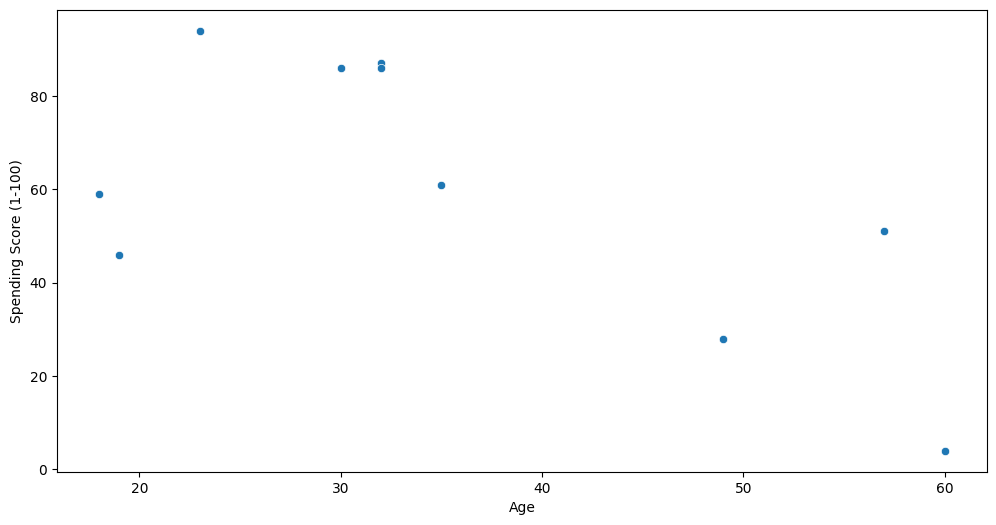

In [15]:
# fig = px.scatter(df_dendogram, x='Age', y='Spending Score (1-100)', hover_data={'CustomerID':df_dendogram.index})
# fig.update_traces(marker=dict(size=15))
# fig.show()

ax = sns.scatterplot(data=df_dendogram, x='Age', y='Spending Score (1-100)')
ax.figure.set_size_inches(12,6)

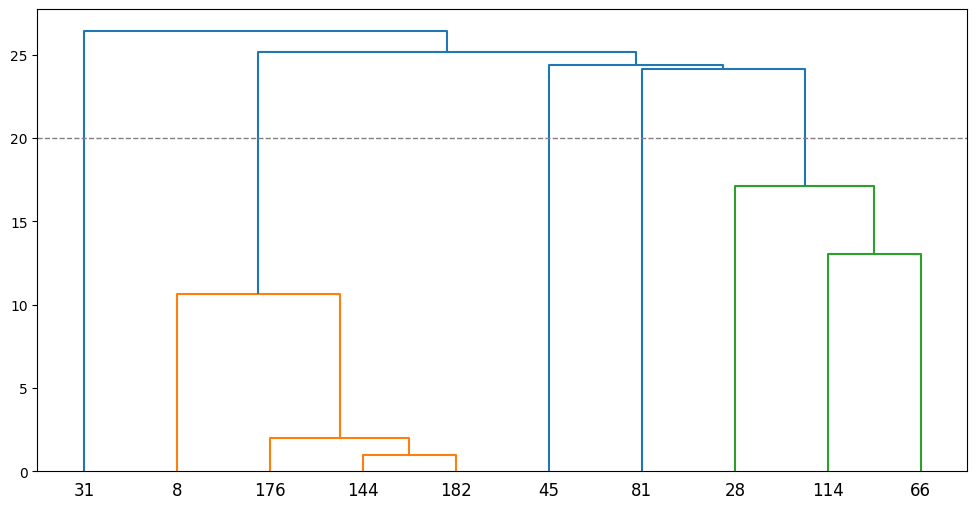

In [16]:
# Calculate the distance entre cada amostra
Z_single = linkage(df_dendogram[['Age', 'Spending Score (1-100)']], method='single', metric='euclidean')
tr = 20
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(12, 6))

dendrogram(Z_single, color_threshold=tr, labels=df_dendogram.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

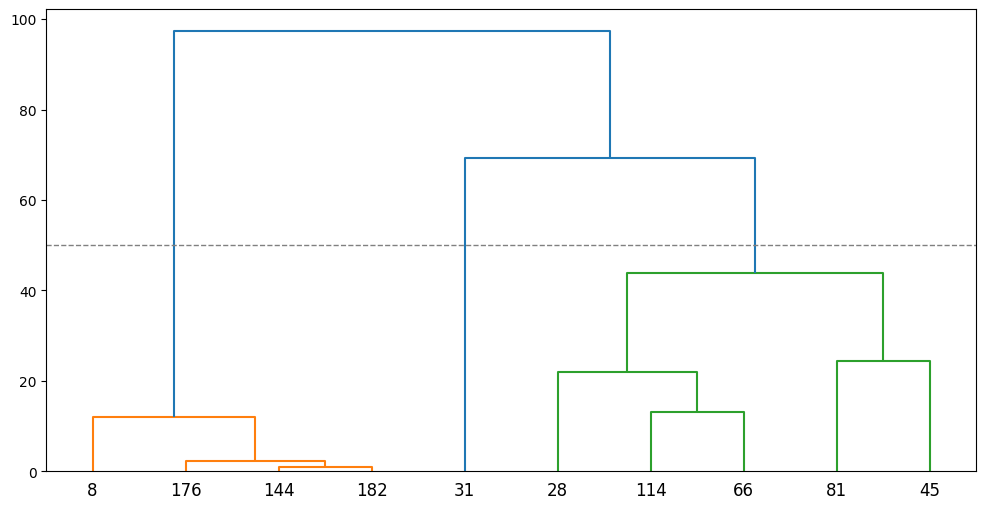

In [17]:
# Calculate the distance entre cada amostra
Z_complete = linkage(df_dendogram[['Age', 'Spending Score (1-100)']], method='complete', metric='euclidean')
tr = 50
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(12, 6))

dendrogram(Z_complete, color_threshold=tr, labels=df_dendogram.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

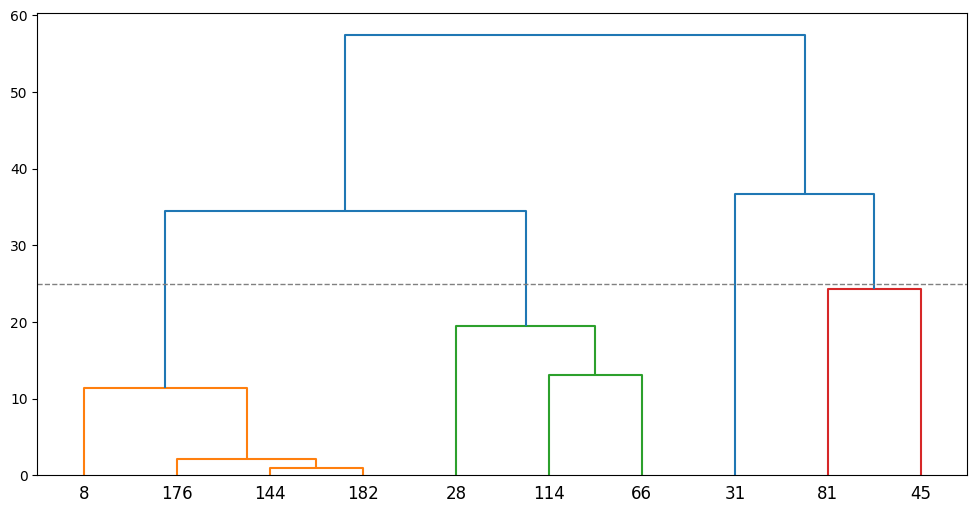

In [18]:
# Calculate the distance entre cada amostra
Z_average = linkage(df_dendogram[['Age', 'Spending Score (1-100)']], method='average', metric='euclidean')
tr = 25
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(12, 6))

dendrogram(Z_average, color_threshold=tr, labels=df_dendogram.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [19]:
labels = fcluster(Z_average, t=tr, criterion='distance')
df_dendogram['cluster_id'] = labels
df_dendogram['cluster_id'] = df_dendogram['cluster_id'].astype('str')
df_dendogram.sort_values(by='cluster_id', inplace=True)

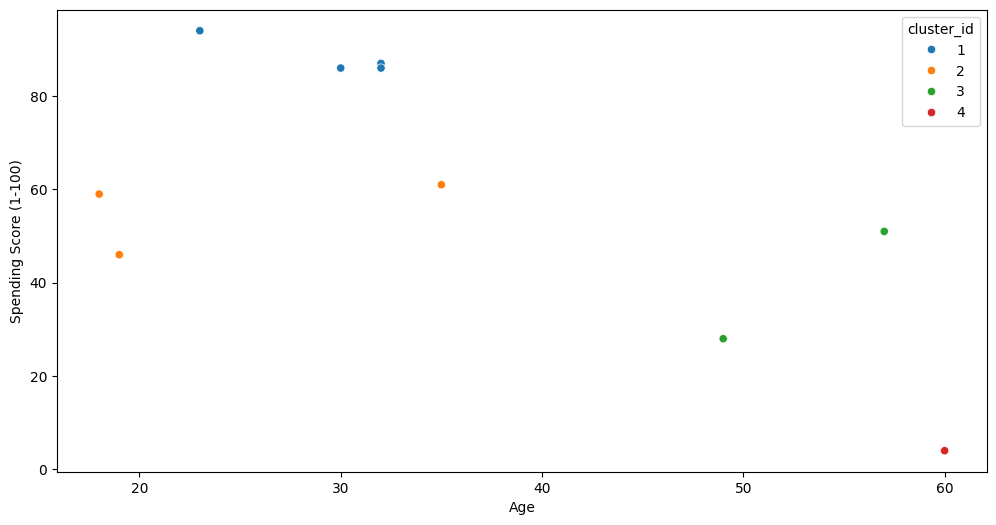

In [20]:
# fig = px.scatter(df_dendogram, x='Age', y='Spending Score (1-100)', hover_data={'CustomerID':df_dendogram.index},
#                  color='cluster_id')
# fig.update_traces(marker=dict(size=15))
# fig.show()

ax = sns.scatterplot(data=df_dendogram, x='Age', y='Spending Score (1-100)', hue='cluster_id')
ax.figure.set_size_inches(12,6)

### Average

In [21]:
index_average = np.random.randint(0, len(df_mall_customers), 10)
index_average

array([ 86, 125, 146, 121, 137, 106,  41, 190, 129, 103])

In [22]:
df_dendogram = df_mall_customers.loc[index_average]
df_dendogram.set_index('CustomerID', inplace=True)
df_dendogram

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
87,1,55,57,58
126,1,31,70,77
147,0,48,77,36
122,1,38,67,40
138,0,32,73,73
107,1,66,63,50
42,0,24,38,92
191,1,34,103,23
130,0,38,71,75


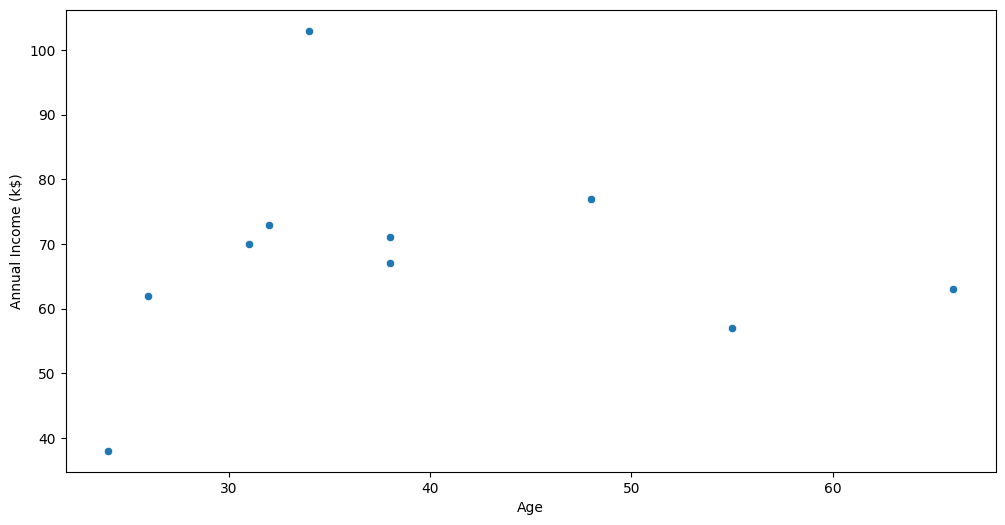

In [23]:
# fig = px.scatter(df_dendogram, x='Age', y='Annual Income (k$)', hover_data={'CustomerID':df_dendogram.index})
# fig.update_traces(marker=dict(size=15))
# fig.show()

ax = sns.scatterplot(data=df_dendogram, x='Age', y='Annual Income (k$)')
ax.figure.set_size_inches(12,6)

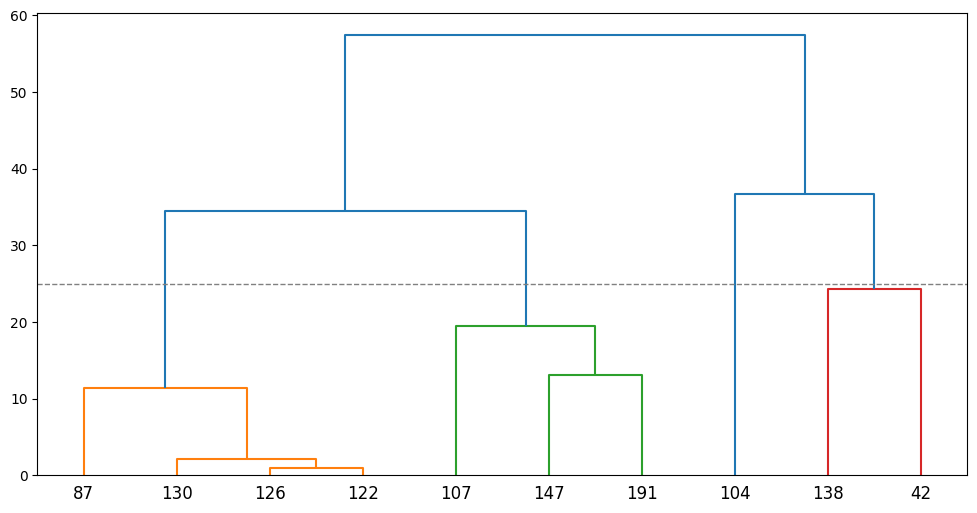

In [24]:
# Calculate the distance entre cada amostra
Z = average(df_dendogram[['Age', 'Annual Income (k$)']])
tr = 25
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(12, 6))

dendrogram(Z_average, color_threshold=tr, labels=df_dendogram.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [25]:
labels = fcluster(Z, t=tr, criterion='distance')
df_dendogram['cluster_id'] = labels
df_dendogram['cluster_id'] = df_dendogram['cluster_id'].astype('str')
df_dendogram.sort_values(by='cluster_id', inplace=True)

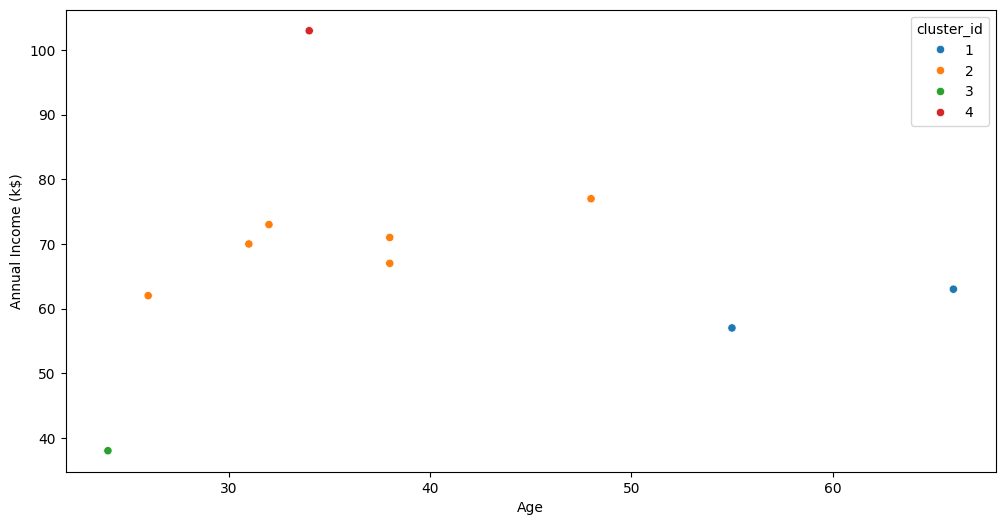

In [26]:
# fig = px.scatter(df_dendogram, x='Age', y='Annual Income (k$)', hover_data={'CustomerID':df_dendogram.index},
#                  color='cluster_id')
# fig.update_traces(marker=dict(size=15))
# fig.show()

ax = sns.scatterplot(data=df_dendogram, x='Age', y='Annual Income (k$)', hue='cluster_id')
ax.figure.set_size_inches(12,6)